In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)

c:\Users\karti\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_exploded=df.explode('job_skills')

<Axes: xlabel='job_skills'>

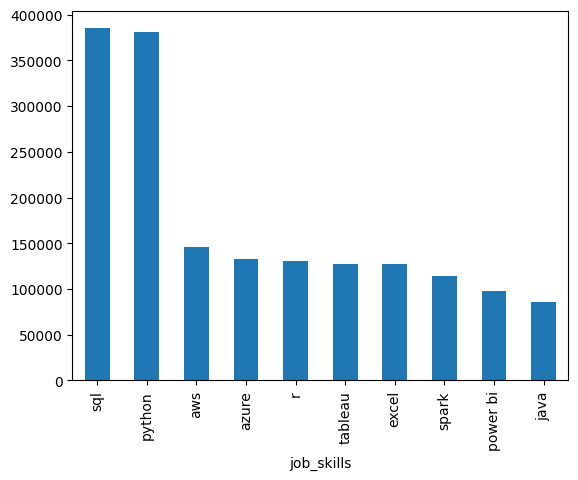

In [13]:
df_exploded['job_skills'].value_counts(ascending=False).head(10).plot(kind='bar')

In [ ]:
skill_count=df_exploded.groupby(['job_title_short','job_skills']).size() #size,count diff

In [26]:
df_skill_count = skill_count.reset_index(name='skill_cou')
df_skill_count

,job_title_short,job_skills,skill_cou
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


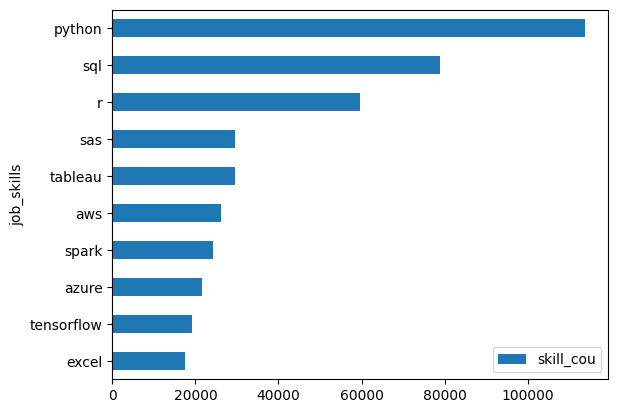

In [37]:
job_title = "Data Scientist"
top_skills = 10

df_skill_final = (
    df_skill_count[df_skill_count['job_title_short'] == job_title]
    .sort_values(by='skill_cou', ascending=False)
    .head(top_skills)
)

df_skill_final.plot(
    kind='barh',
    x='job_skills',
    y='skill_cou'
)
plt.gca().invert_yaxis()


In [56]:
df_DA=df[df.job_title_short =='Data Engineer'].copy()
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,None,NaN,NaN,Zitec,"[sql, nosql, gcp, azure, aws, bigquery, databr...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785729,Data Engineer,Data Engineer Marketing Intelligence,Jerman,melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,IU Internationale Hochschule,None,None
785730,Data Engineer,"Data Center Engineering Operations Engineer , ...","Bangkok, Thailand",melalui LinkedIn,Pekerjaan tetap,False,Thailand,2023-03-12 06:37:47,False,False,Thailand,None,NaN,NaN,Amazon Web Services (AWS),"[excel, word, outlook]","{'analyst_tools': ['excel', 'word', 'outlook']}"
785731,Data Engineer,Data Engineer,"Overland Park, Kansas, Amerika Serikat",melalui LinkedIn,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:17,False,False,Sudan,None,NaN,NaN,Shamrock Trading Corporation,"[nosql, mongodb, mongodb, python, elasticsearc...","{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
785732,Data Engineer,Data Engineer (f/m/d),"Heidelberg, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,False,False,Germany,None,NaN,NaN,Heidelberg Materials,"[python, c#, java, scala, sql, postgresql, sql...","{'cloud': ['azure', 'databricks'], 'databases'..."


In [57]:
df_DA['job_posted_month']=df_DA['job_posted_date'].dt.month
df_DA_explode = df_DA.explode('job_skills')

df_DA_pivot=df_DA_explode.pivot_table(
    index='job_posted_month',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)


job_skills,sql,python,aws,azure,spark
job_posted_month,,,,,
1,12987,12426,6924,7138,6567
2,9792,9378,5446,5278,4948
3,9831,9410,5580,5283,4764
4,8975,8670,5012,4901,4316
5,8411,8169,4768,4466,3991
6,9713,9216,5280,5091,4654
7,9032,8493,5015,4857,4044
8,9565,9016,5330,5070,4436
9,8663,8213,4612,4646,3902


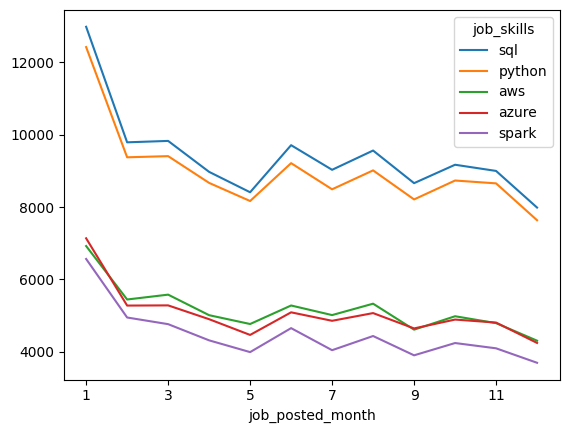

In [58]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot.iloc[:, :5].plot(kind='line')
df_DA_pivot.iloc[:, :5]
